In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StudentPerformanceFactors.csv')

In [13]:
df.shape

(6378, 20)

In [14]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
df.duplicated().sum()


0

In [15]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [16]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


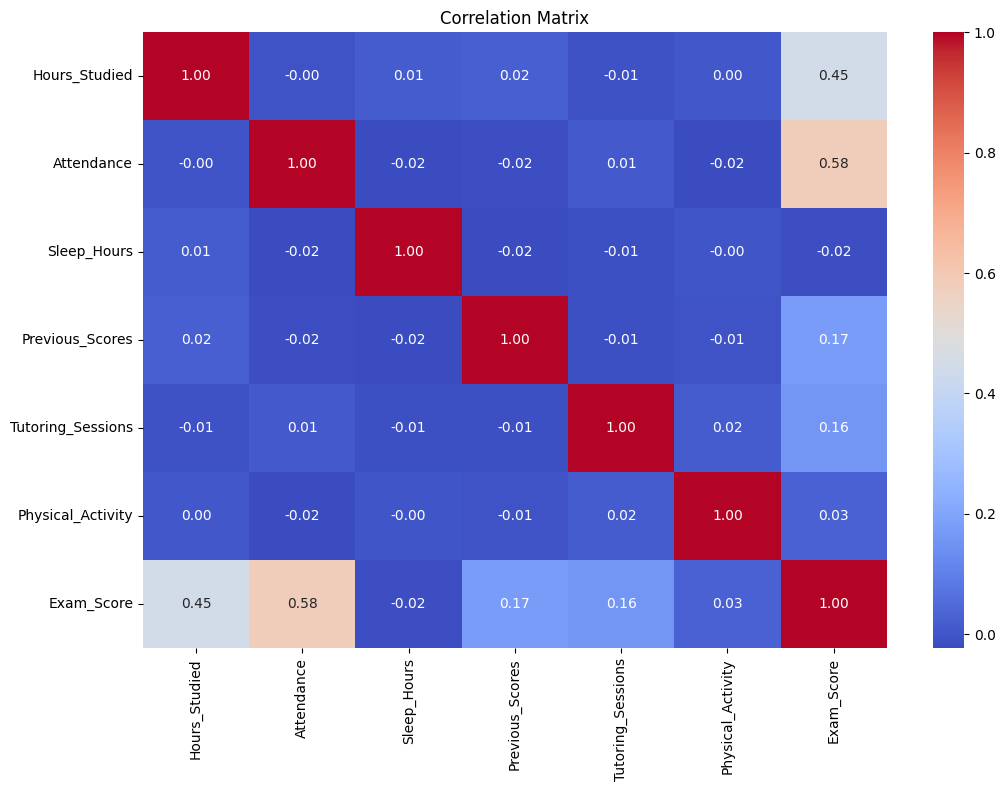

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
df['Motivation_Level'].value_counts()

Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

In [20]:
df.groupby('Motivation_Level')['Exam_Score'].mean()

Motivation_Level
High      67.743931
Low       66.764485
Medium    67.338894
Name: Exam_Score, dtype: float64

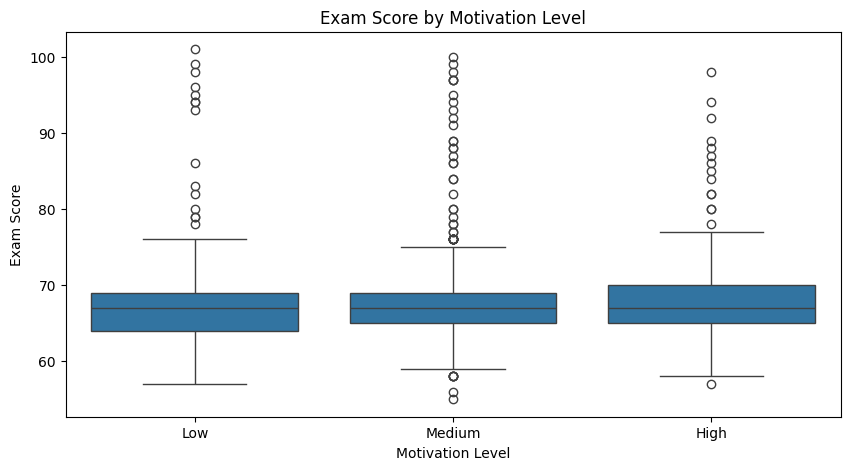

In [122]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.title('Exam Score by Motivation Level')
plt.show()

In [22]:
df.groupby('School_Type')['Exam_Score'].mean()

School_Type
Private    67.316358
Public     67.223951
Name: Exam_Score, dtype: float64

In [29]:
df.groupby('School_Type')['Attendance'].mean()

School_Type
Private    80.386831
Public     79.860397
Name: Attendance, dtype: float64

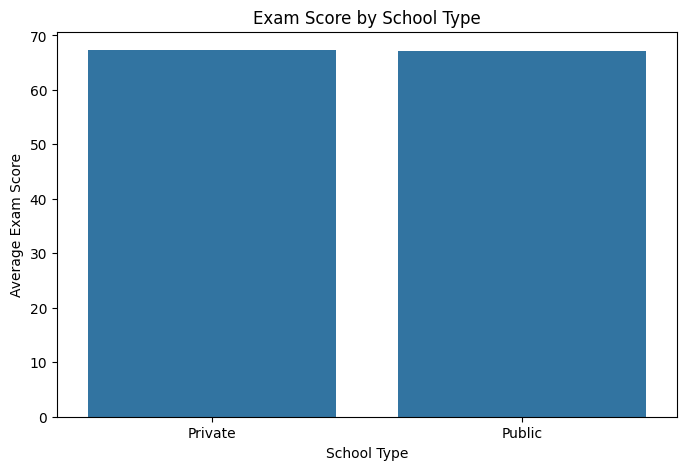

In [118]:
plt.figure(figsize=(8,5))
sns.barplot(x=df.groupby('School_Type')['Exam_Score'].mean().index, 
            y=df.groupby('School_Type')['Exam_Score'].mean().values)
plt.xlabel('School Type')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by School Type')
plt.show()

In [94]:
df.groupby('Attendance')['Exam_Score'].mean()

Attendance
60     62.364706
61     63.367742
62     63.719178
63     64.392157
64     63.846591
65     63.881579
66     64.492857
67     64.593407
68     65.114458
69     65.156627
70     65.493243
71     65.620000
72     65.718750
73     66.000000
74     66.327044
75     66.319444
76     66.888268
77     66.627119
78     66.911392
79     66.846154
80     67.147239
81     67.291925
82     67.351515
83     67.986842
84     67.828402
85     67.866197
86     68.657718
87     68.804054
88     68.941176
89     69.114650
90     70.019868
91     69.402367
92     69.740000
93     69.828221
94     69.554286
95     70.106250
96     70.554878
97     70.339869
98     70.685393
99     70.940000
100    70.848101
Name: Exam_Score, dtype: float64

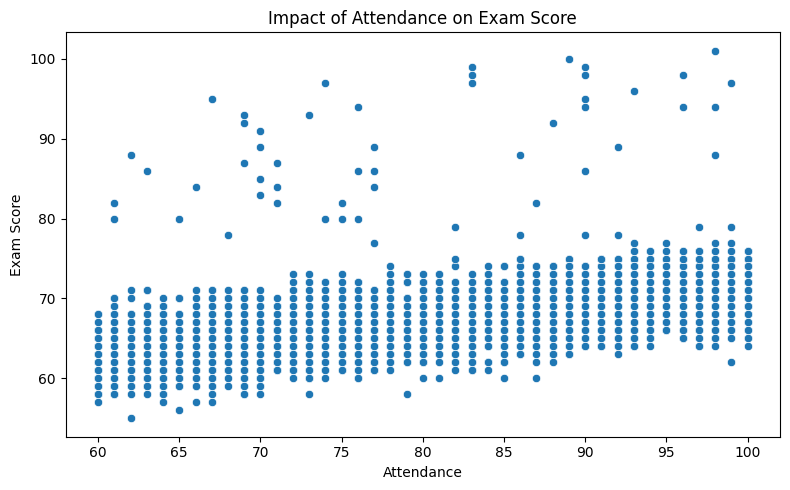

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Impact of Attendance on Exam Score')

plt.tight_layout()
plt.show()

In [24]:
df.groupby('Access_to_Resources')['Exam_Score'].mean()

Access_to_Resources
High      68.103158
Low       66.223705
Medium    67.156367
Name: Exam_Score, dtype: float64

In [34]:
df['Internet_Access'].value_counts()

Internet_Access
Yes    5893
No      485
Name: count, dtype: int64

In [56]:
df.groupby('Tutoring_Sessions')['Exam_Score'].mean()

Tutoring_Sessions
0    66.506859
1    66.998579
2    67.556747
3    67.953750
4    68.239865
5    69.089109
6    71.666667
7    69.857143
8    69.000000
Name: Exam_Score, dtype: float64

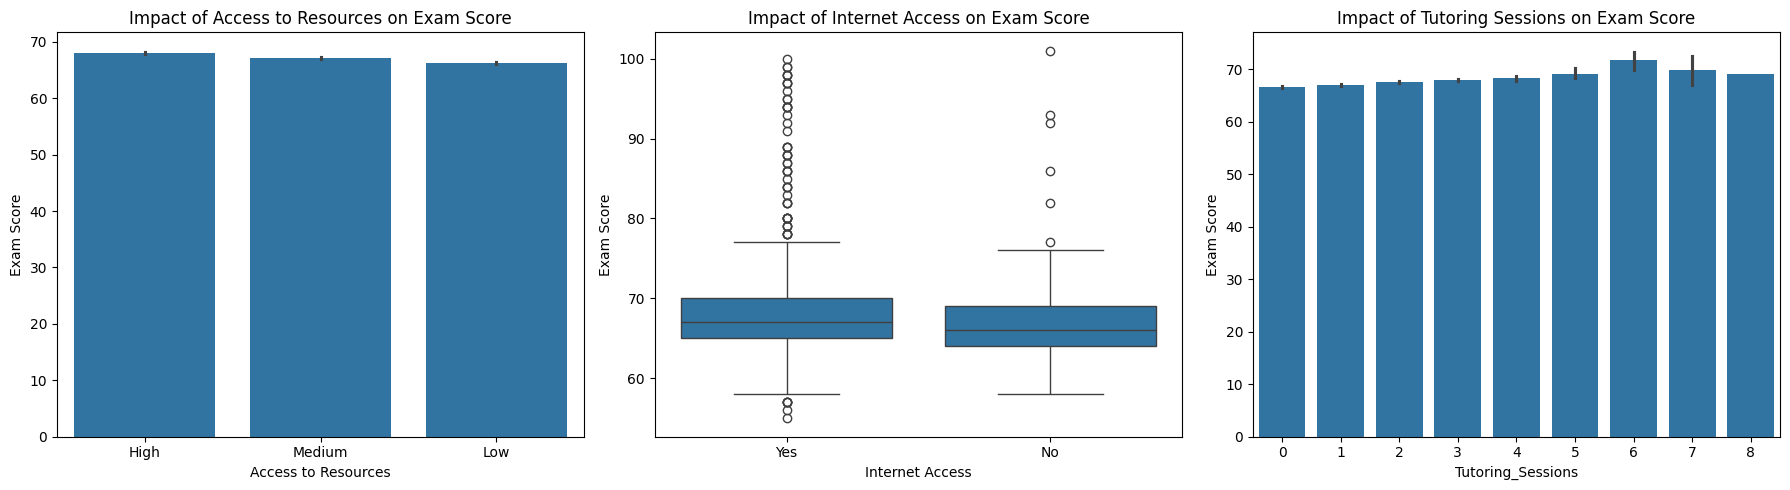

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Access_to_Resources', y='Exam_Score', data=df, ax=axes[0])
axes[0].set_xlabel('Access to Resources')
axes[0].set_ylabel('Exam Score')
axes[0].set_title('Impact of Access to Resources on Exam Score')

sns.boxplot(x='Internet_Access', y='Exam_Score', data=df, ax=axes[1])
axes[1].set_xlabel('Internet Access')
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Impact of Internet Access on Exam Score')

sns.barplot(x='Tutoring_Sessions', y='Exam_Score', data=df, ax=axes[2])
axes[2].set_xlabel('Tutoring_Sessions')
axes[2].set_ylabel('Exam Score')
axes[2].set_title('Impact of Tutoring Sessions on Exam Score')

plt.tight_layout()
plt.show()

In [99]:
df[df['Sleep_Hours'] < 5].shape[0]

296

In [32]:
df[df['Sleep_Hours'] < 5]['Exam_Score'].mean(), df[df['Sleep_Hours'] > 8]['Exam_Score'].mean()

(67.69256756756756, 67.13541666666667)

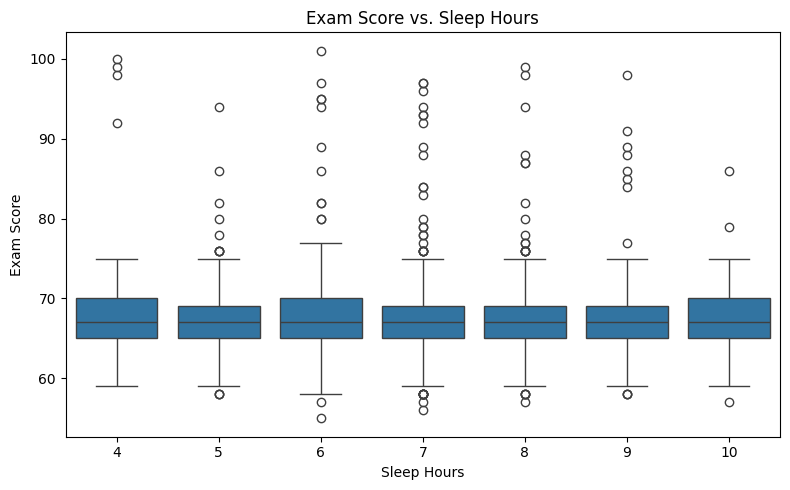

In [124]:
plt.figure(figsize=(8,5))

sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=df)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Sleep Hours')

plt.tight_layout()
plt.show()

In [36]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3159
College         1939
Postgraduate    1280
Name: count, dtype: int64

In [39]:
df[df['Parental_Education_Level'] == 'College']['Exam_Score'].mean(), df[df['Parental_Education_Level'] == 'Postgraduate']['Exam_Score'].mean()

(67.35843218153687, 67.97265625)

In [60]:
df.groupby('Parental_Involvement')['Exam_Score'].mean()

Parental_Involvement
High      68.112200
Low       66.378776
Medium    67.113196
Name: Exam_Score, dtype: float64

In [61]:
df[df['Parental_Involvement'] == 'Low']['Exam_Score'].mean(), df[df['Parental_Involvement'] == 'High']['Exam_Score'].mean()

(66.37877614252517, 68.11220043572985)

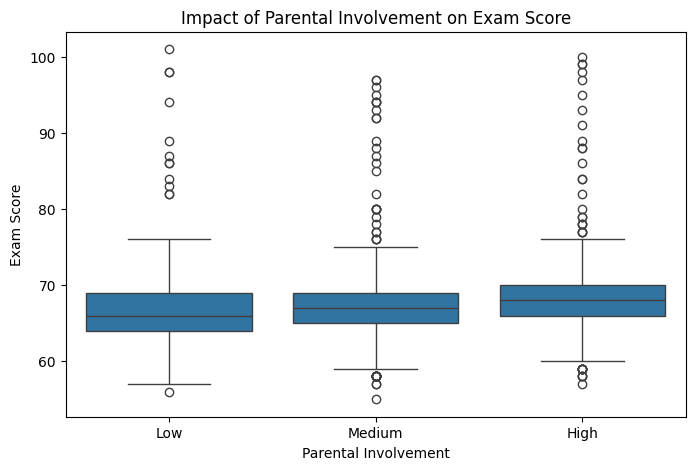

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.title('Impact of Parental Involvement on Exam Score')
plt.show()

In [40]:
df['Exam_Score'].describe()

count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [41]:
df['Hours_Studied'].max(), df['Hours_Studied'].min()

(44, 1)

In [44]:
df.nlargest(5, 'Hours_Studied')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2895,44,68,High,Low,No,9,75,Low,Yes,3,Medium,High,Private,Negative,2,No,High School,Moderate,Female,71
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
1615,39,95,Medium,High,Yes,9,54,High,Yes,2,Medium,Medium,Private,Positive,3,No,High School,Moderate,Male,77
1957,39,97,High,High,Yes,10,91,Medium,Yes,2,Low,Medium,Public,Positive,3,No,High School,Moderate,Female,79
2305,39,92,Medium,Medium,No,9,73,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,Postgraduate,Moderate,Male,75


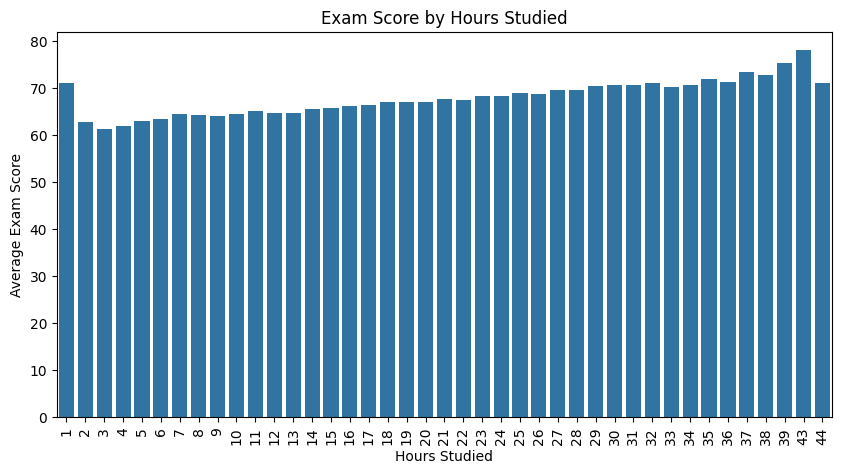

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('Hours_Studied')['Exam_Score'].mean().index, 
            y=df.groupby('Hours_Studied')['Exam_Score'].mean().values)
plt.xticks(rotation=90)
plt.xlabel('Hours Studied')
plt.ylabel('Average Exam Score')
plt.title('Exam Score by Hours Studied')
plt.show()

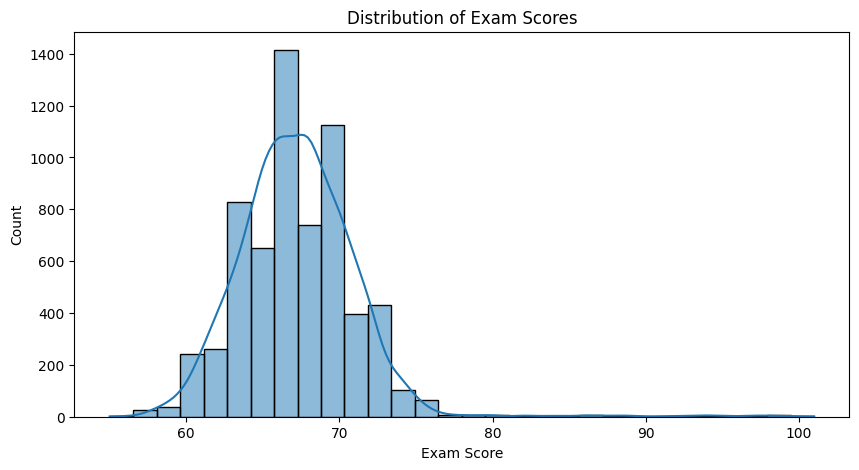

In [126]:
plt.figure(figsize=(10,5))
sns.histplot(df['Exam_Score'], bins=30, kde=True)
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.title('Distribution of Exam Scores')
plt.show()

In [43]:
df[df['Distance_from_Home'] == 'Far']['Exam_Score'].mean(), df[df['Distance_from_Home'] == 'Near']['Exam_Score'].mean()

(66.49842767295597, 67.51381215469613)

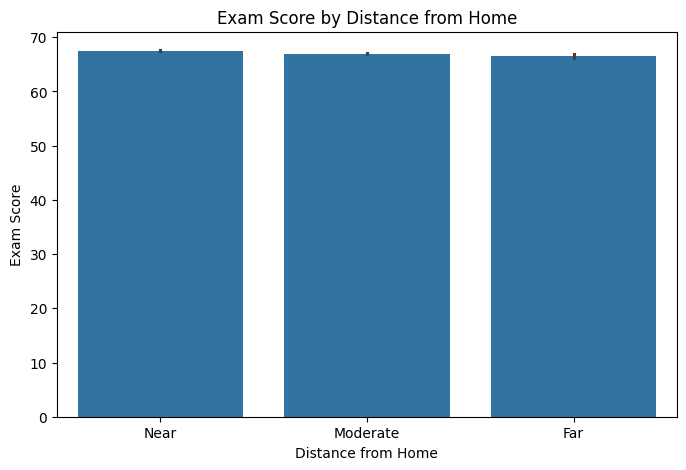

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(x='Distance_from_Home', y='Exam_Score', data=df)
plt.xlabel('Distance from Home')
plt.ylabel('Exam Score')
plt.title('Exam Score by Distance from Home')
plt.show()